<a href="https://colab.research.google.com/github/UW-CTRL/AA548-spr23/blob/main/demos/Shooting_method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
plt.style.use('seaborn-ticks')


<ipython-input-1-bd69502ae8ad>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-ticks')


In [2]:
dt = 0.1
A_dynamics = np.array([[1., 0., dt, 0.],
                        [0., 1., 0., dt],
                        [0., 0., 1., 0.],
                        [0., 0., 0., 1.]])

B_dynamics = np.array([[0.5 * dt**2, 0.],
                        [0., 0.5 * dt**2],
                        [dt, 0.],
                        [0., dt]])  

## Shooting method

In [3]:
T = 50
n = 4
m = 2

us = cp.Variable([T,m])

# quadratic cost matrices
Q = np.diag([1., 2., 0., 4.]) 
Qt = np.eye(n) * 5.0
R = np.diag([0., 2.])

goal_state = np.zeros(n)
initial_state = np.array([-4, 0., 0., 2.])
state = initial_state
u_max = 2.


objective = 0
constraints = []
for t in range(T):
    objective += cp.quad_form(state, Q) + cp.quad_form(us[t], R)
    state = A_dynamics @ state + B_dynamics @ us[t]
    constraints += [cp.norm(us[t], 2) <= u_max]
objective += cp.quad_form(state - goal_state, Qt)

problem = cp.Problem(cp.Minimize(objective), constraints)
problem.solve()

444.406913423753

In [4]:
states = [initial_state]
for t in range(T):
    states.append(A_dynamics @ states[t] + B_dynamics @ us.value[t])
states = np.stack(states)

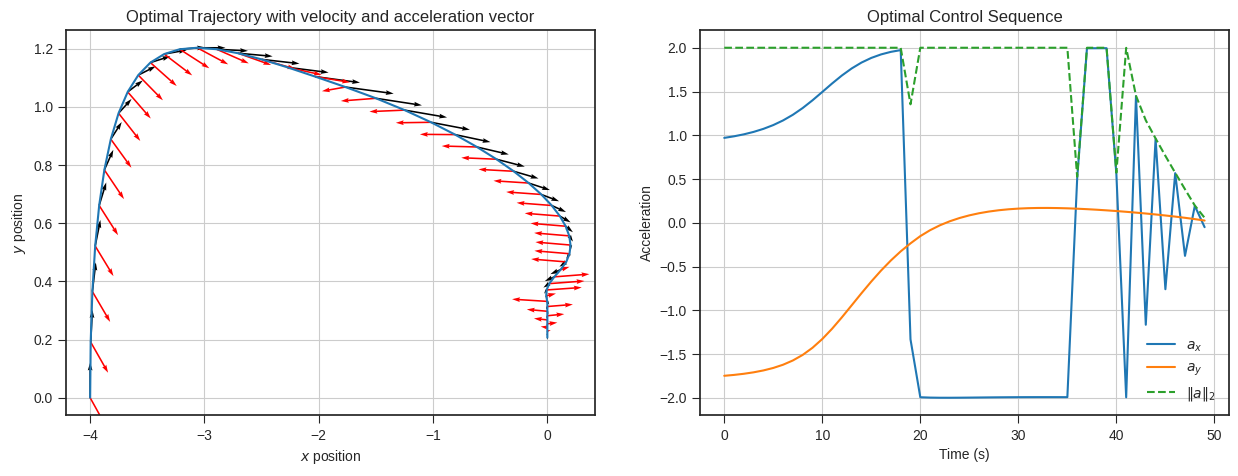

In [5]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(states[:,0], states[:,1])
plt.quiver(states[:,0], states[:,1], states[:,2], states[:,3], scale=30, width=.003)
plt.quiver(states[:-1,0], states[:-1,1], us.value[:,0], us.value[:,1], scale=30, width=.003, color='red')
plt.title("Optimal Trajectory with velocity and acceleration vector")
plt.xlabel("$x$ position")
plt.ylabel("$y$ position")
plt.grid()

plt.subplot(1,2,2)
plt.plot(us.value)
plt.plot(np.linalg.norm(us.value, 2, axis=1), '--')
plt.title("Optimal Control Sequence")
plt.xlabel("Time (s)")
plt.ylabel("Acceleration")
plt.legend(["$a_x$", "$a_y$", "$\|a\|_2$"])
plt.grid()